In [2]:
import numpy as np
import numpy.random
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

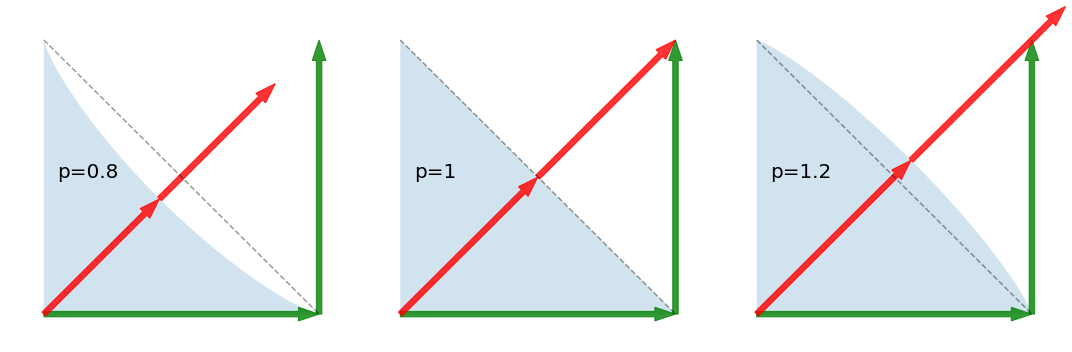

In [3]:
p1, peq, p2 = 0.8, 1, 1.2

fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax, p in zip([ax1, ax2, ax3], [p1, peq, p2]):
    
    xs = np.arange(0, 1, 0.001)
    ys = (1-xs**p)**(1/p)
    
    ax.fill_between(xs, 0, ys, alpha=0.2)
    
    ax.arrow(0, 0, 1, 0, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='g')
    ax.arrow(1, 0, 0, 1, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='g')
    
    len_diag = 2**(-1/p)
    
    ax.arrow(0, 0, len_diag, len_diag, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='r')
    ax.arrow(len_diag, len_diag, len_diag, len_diag, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='r')
    
    ax.plot([0, 1], [1, 0], 'k--', alpha=0.4)
    ax.axis('off')
    ax.set(xlim=(-.05, 2*2**(-1/p2)), ylim=(-.05, 2*2**(-1/p2)))
    ax.annotate(f'p={p}', (0.05, .5), size=20)        
plt.tight_layout()

plt.savefig('img/stepwise3.pdf')

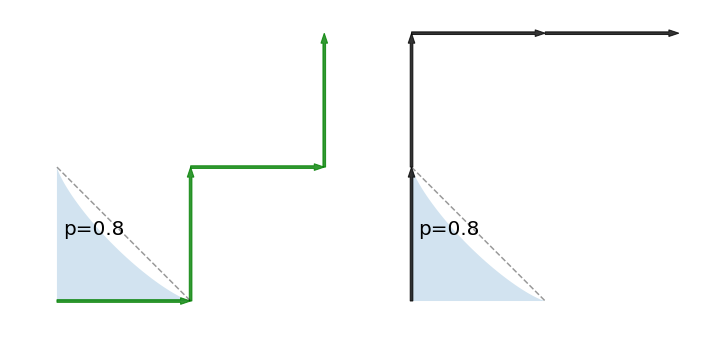

In [23]:
p=0.8

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  
xs = np.arange(0, 1, 0.001)
ys = (1-xs**p)**(1/p)

ax1.arrow(0, 0, 1, 0, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='g')
ax1.arrow(1, 0, 0, 1, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='g')
ax1.arrow(1, 1, 1, 0, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='g')
ax1.arrow(2, 1, 0, 1, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='g')


ax2.arrow(0, 0, 0, 1, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='k')
ax2.arrow(0, 1, 0, 1, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='k')
ax2.arrow(0, 2, 1, 0, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='k')
ax2.arrow(1, 2, 1, 0, length_includes_head=True, head_width=0.05, width =0.02, alpha=0.8, color='k')


for ax in [ax1, ax2]:
    ax.fill_between(xs, 0, ys, alpha=0.2)
    ax.plot([0, 1], [1, 0], 'k--', alpha=0.4)
    ax.axis('off')
    ax.set(xlim=(-0.2, 2.2), ylim=(-0.2, 2.2))
    ax.annotate(f'p={p}', (0.05, .5), size=20)        

plt.tight_layout()

plt.savefig('img/diffpaths.pdf')

In [4]:
def rms(x):
    return np.sqrt(x.dot(x)/x.size)

In [5]:
def min_steps(p, r, l=1):
    if p < 1:
        return 2/r
    else:
        return ((2*l)**(1/p))/r

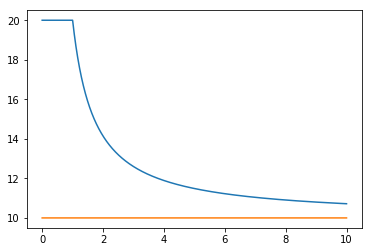

In [6]:
ps = np.arange(0, 10, .001)
plt.plot(ps, [min_steps(p, .1, 1) for p in ps])
plt.plot(ps, [1/.1]*len(ps))

In [7]:
n=4
trys = 10000

ns = np.arange(2, 101, 2)
means = []
sds = []

for n in ns:

    a = (np.arange(n)%2 == 0)*2 -1
    
    current = []

    for _ in range(trys):
        np.random.shuffle(a)
        current.append(rms(a.cumsum()))
        
    means.append(np.mean(current))
    sds.append(np.std(current))

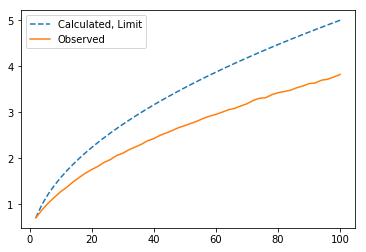

In [13]:
plt.plot(ns, np.sqrt(ns)/2, label='Calculated, Limit', ls='--')
plt.plot(ns, means, label='Observed')
plt.legend()

In [11]:
a.cumsum()

array([ -1,  -2,  -1,   0,  -1,  -2,  -3,  -2,  -3,  -2,  -3,  -4,  -5,
        -6,  -7,  -8,  -7,  -8,  -7,  -8,  -7,  -8,  -9, -10, -11, -12,
       -11, -10, -11, -12, -13, -12, -11, -12, -13, -14, -13, -12, -11,
       -10, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -5,  -6,  -5,  -6,
        -5,  -6,  -5,  -6,  -5,  -4,  -3,  -2,  -1,  -2,  -1,   0,   1,
         0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,   9,   8,
         9,   8,   7,   6,   5,   4,   3,   2,   3,   2,   1,   0,   1,
         0,  -1,   0,   1,   0,   1,   2,   1,   0])